In [31]:
%matplotlib qt

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [33]:
# Load EEG data
eeg_data = np.load(r'OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\eeg-trials_2-per-class_run-1.npy')  # Shape: (channels, timepoints)
eeg_data_reshaped = eeg_data.reshape(8, -1)
# Convert to MNE object for preprocessing
info = mne.create_info(ch_names=[f'EEG {i+1}' for i in range(eeg_data_reshaped.shape[0])], 
                       sfreq=250, ch_types='eeg')
raw = mne.io.RawArray(eeg_data_reshaped, info)

# Preprocess (e.g., filtering)
raw.filter(1, 30, fir_design='firwin')

# Export back to NumPy for feature extraction
cleaned_data = raw.get_data()

Creating RawArray with float64 data, n_channels=8, n_times=2800
    Range : 0 ... 2799 =      0.000 ...    11.196 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 s)



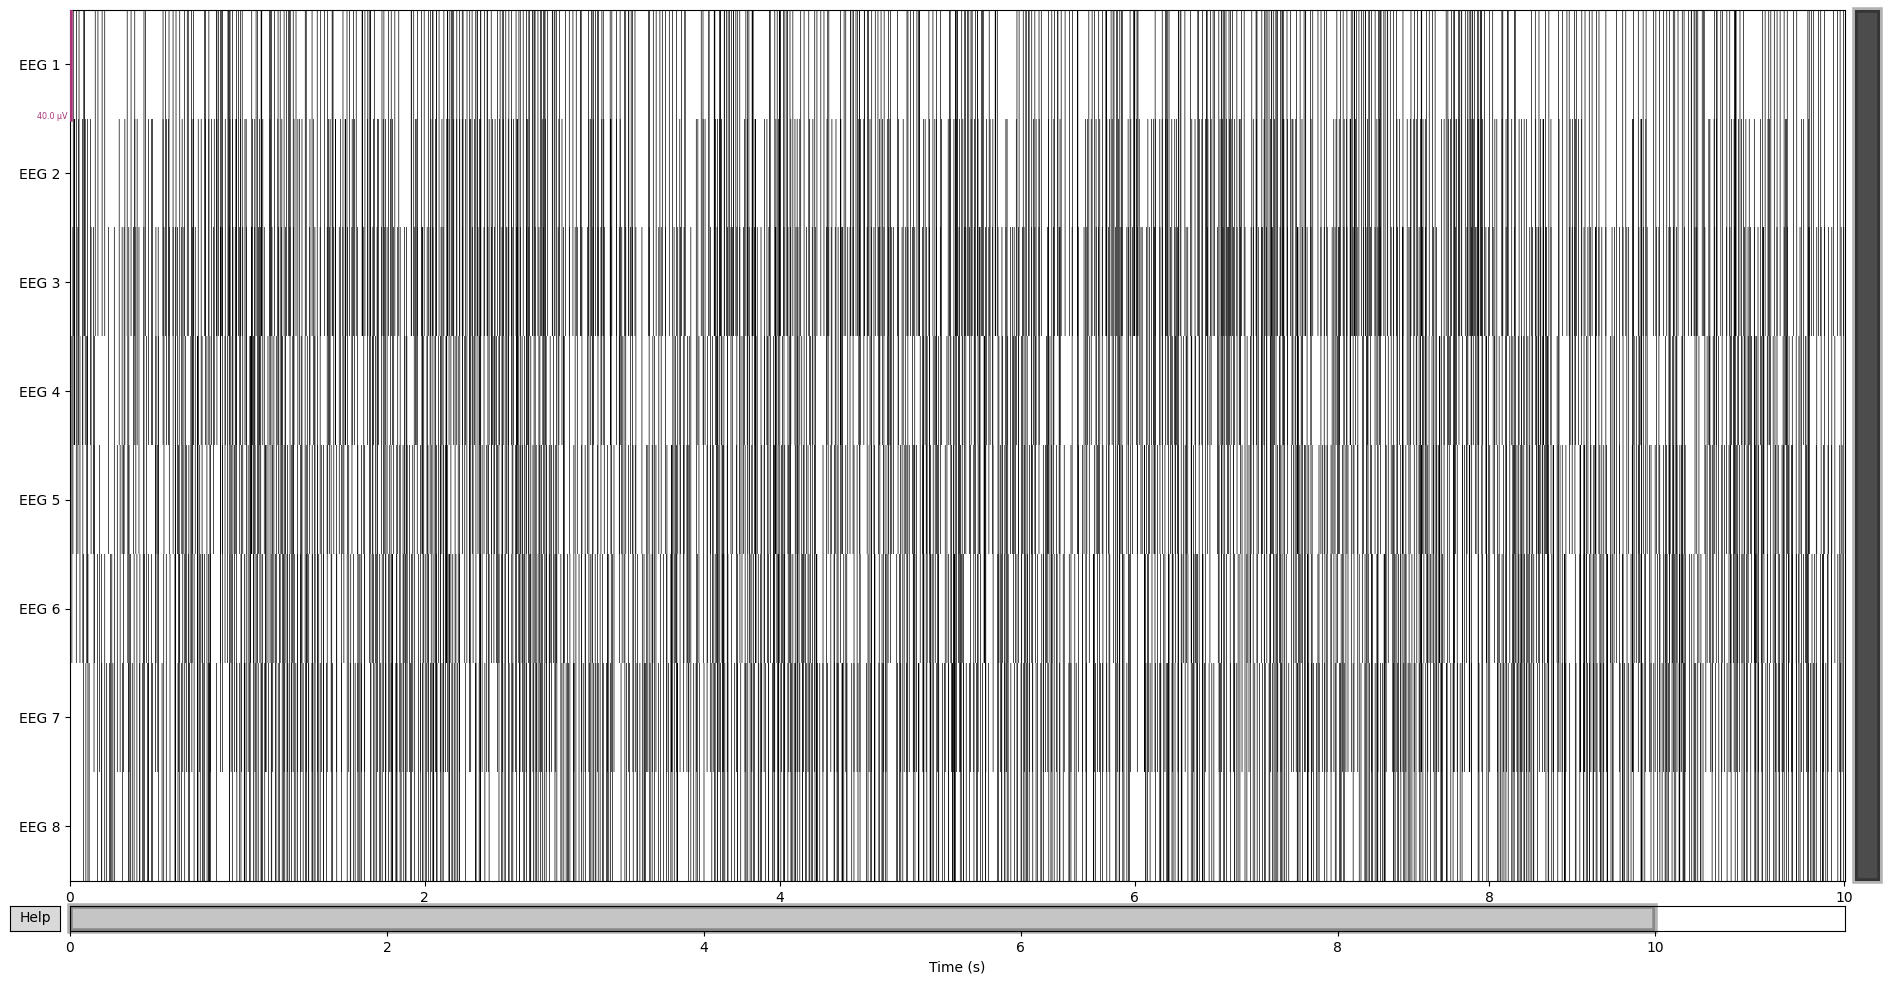

In [34]:
raw.plot()

In [35]:
aux_data = np.load(r'OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\aux_2-per-class_run-1.npy')
print(aux_data.shape)
photo_trigger = (aux_data[1] > 20).astype(int)
trial_starts = np.where(np.diff(photo_trigger) == 1)[0]
trial_ends = np.where(np.diff(photo_trigger) == -1)[0]

(3, 4930)


In [36]:
# Get the sampling frequency from the raw object
sfreq = raw.info['sfreq']  # Sampling frequency in Hz (e.g., 250 Hz)

# Convert trial starts and ends to time (in seconds)
trial_starts_sec = trial_starts / sfreq
trial_ends_sec = trial_ends / sfreq

# Calculate total duration
total_samples = aux_data.shape[1]  # Total number of samples in aux_data
total_duration_sec = total_samples / sfreq  # Total duration in seconds
print(f"Total duration: {total_duration_sec:.2f} seconds")

# Create a time array for each sample
time_array = np.arange(total_samples) / sfreq  # Time in seconds for each sample
print(f"Time array (first 10 values): {time_array[:10]}")

Total duration: 19.72 seconds
Time array (first 10 values): [0.    0.004 0.008 0.012 0.016 0.02  0.024 0.028 0.032 0.036]


In [37]:
import matplotlib.pyplot as plt

plt.plot(time_array, aux_data[1], label="Photosensor Signal")
plt.scatter(trial_starts_sec, aux_data[1][trial_starts], color='green', label="Trial Starts")
plt.scatter(trial_ends_sec, aux_data[1][trial_ends], color='red', label="Trial Ends")
plt.axhline(20, color='orange', linestyle='--', label="Threshold = 20")
plt.legend()
plt.title("Photosensor Signal with Detected Trials")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.show()

In [38]:
# Calculate trial durations as the difference between trial ends and starts
trial_durations_sec = trial_ends_sec - trial_starts_sec

# Create annotations for each trial
annotations = mne.Annotations(
    onset=trial_starts_sec,  # Start times of trials
    duration=trial_durations_sec,  # Duration of each trial
    description=['Trial'] * len(trial_starts_sec)  # Label for each trial
)

raw.set_annotations(annotations)

C:\Users\vip11\AppData\Local\Temp\ipykernel_19300\1471009019.py:11: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
C:\Users\vip11\AppData\Local\Temp\ipykernel_19300\1471009019.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


<RawArray | 8 x 2800 (11.2 s), ~186 KiB, data loaded>

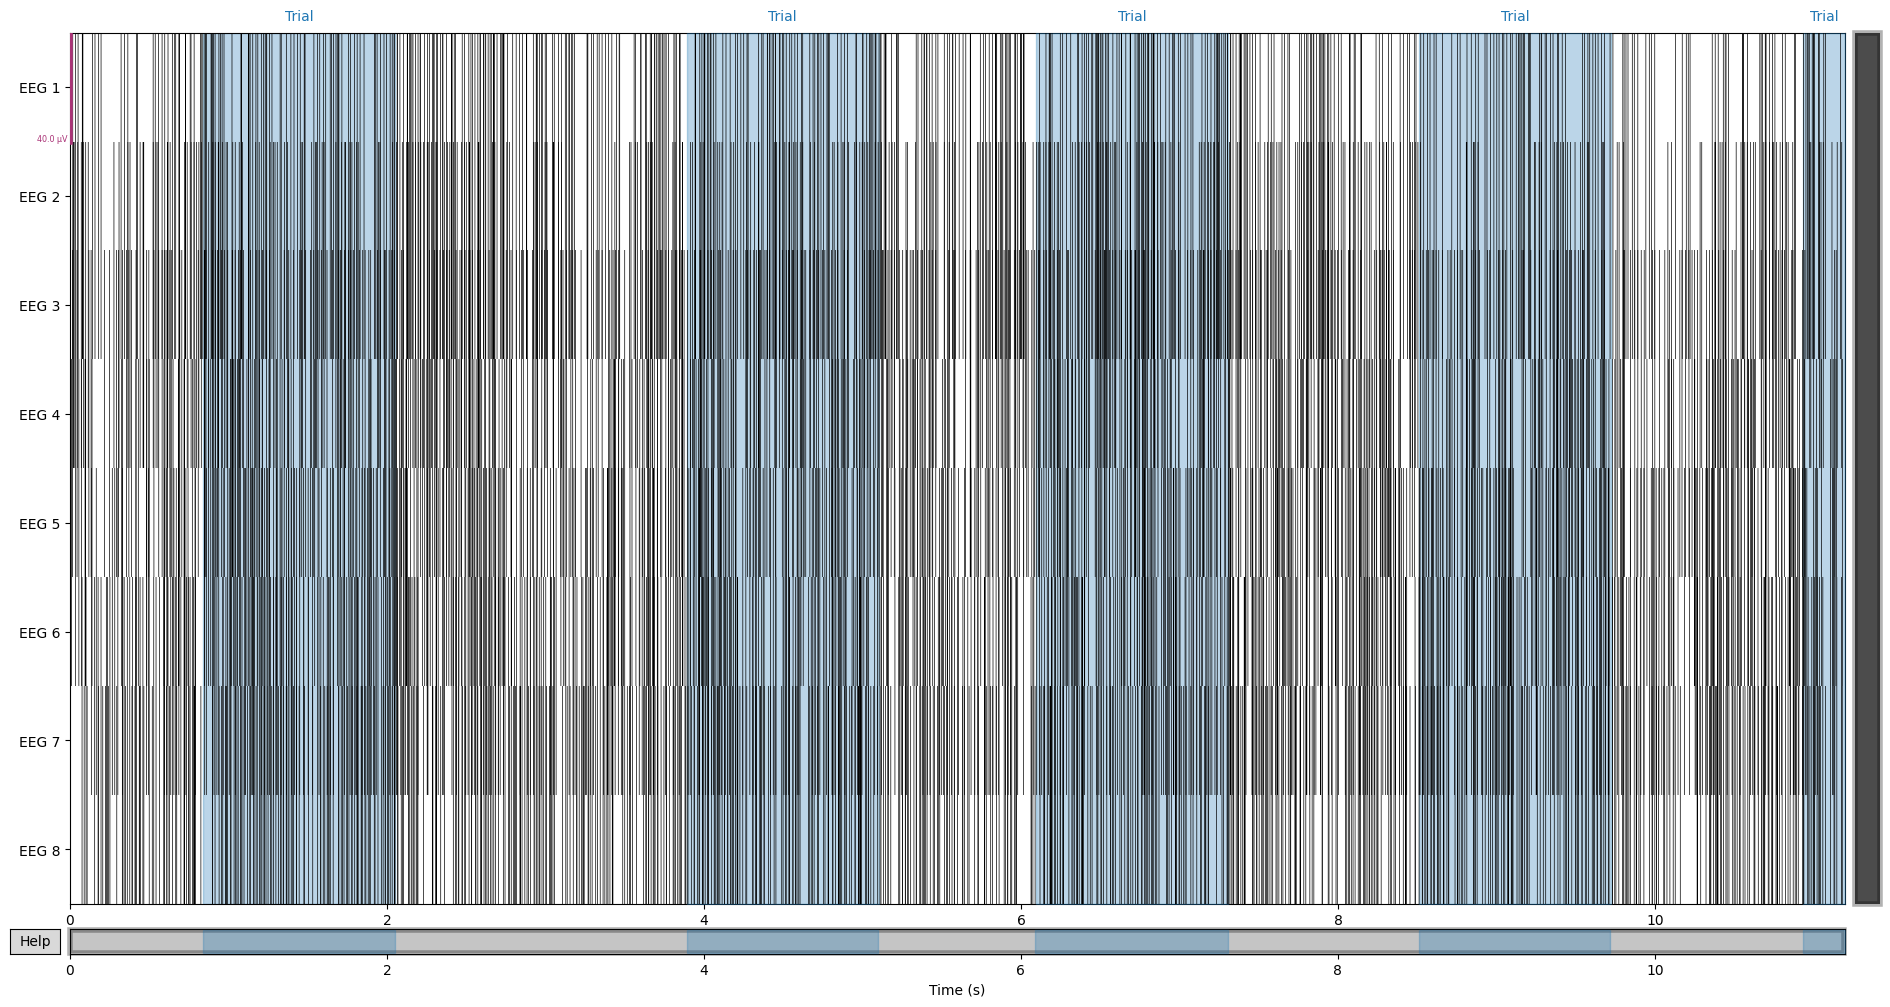

In [39]:
raw.plot(duration=20)

In [40]:
# Load your data (replace with the actual file paths)
eeg_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\eeg_2-per-class_run-1.npy")  # Shape: (n_channels, n_samples)
aux_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\aux_2-per-class_run-1.npy")  # Shape: (3, n_samples)

# Sampling frequency (replace with the actual value from your experiment)
sfreq = 250  # Example: 250 Hz

# Time array
n_samples = eeg_data.shape[1]
time = np.arange(n_samples) / sfreq  # Time in seconds

# Detect trial starts and ends using the photosensor signal (aux[1])
photo_trigger = (aux_data[1] > 20).astype(int)
trial_starts = np.where(np.diff(photo_trigger) == 1)[0]
trial_ends = np.where(np.diff(photo_trigger) == -1)[0]

# Convert trial starts and ends to time (in seconds)
trial_starts_sec = trial_starts / sfreq
trial_ends_sec = trial_ends / sfreq

for i in range(8):
    # Select the EEG channel to plot (e.g., the first channel)
    channel_idx = i  # Change this to select a different channel
    channel_data = eeg_data[channel_idx]

    # Plot the EEG data
    plt.figure(figsize=(15, 5))
    plt.plot(time, channel_data, label=f"EEG Channel {channel_idx + 1}", color='blue')

    # Overlay trial start and end markers
    for start, end in zip(trial_starts_sec, trial_ends_sec):
        plt.axvline(start, color='green', linestyle='--', label='Trial Start' if start == trial_starts_sec[0] else "")
        plt.axvline(end, color='red', linestyle='--', label='Trial End' if end == trial_ends_sec[0] else "")

    # Add labels, legend, and grid
    plt.title("EEG Data with Trial Markers")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

Creating RawArray with float64 data, n_channels=8, n_times=4930
    Range : 0 ... 4929 =      0.000 ...    19.716 secs
Ready.


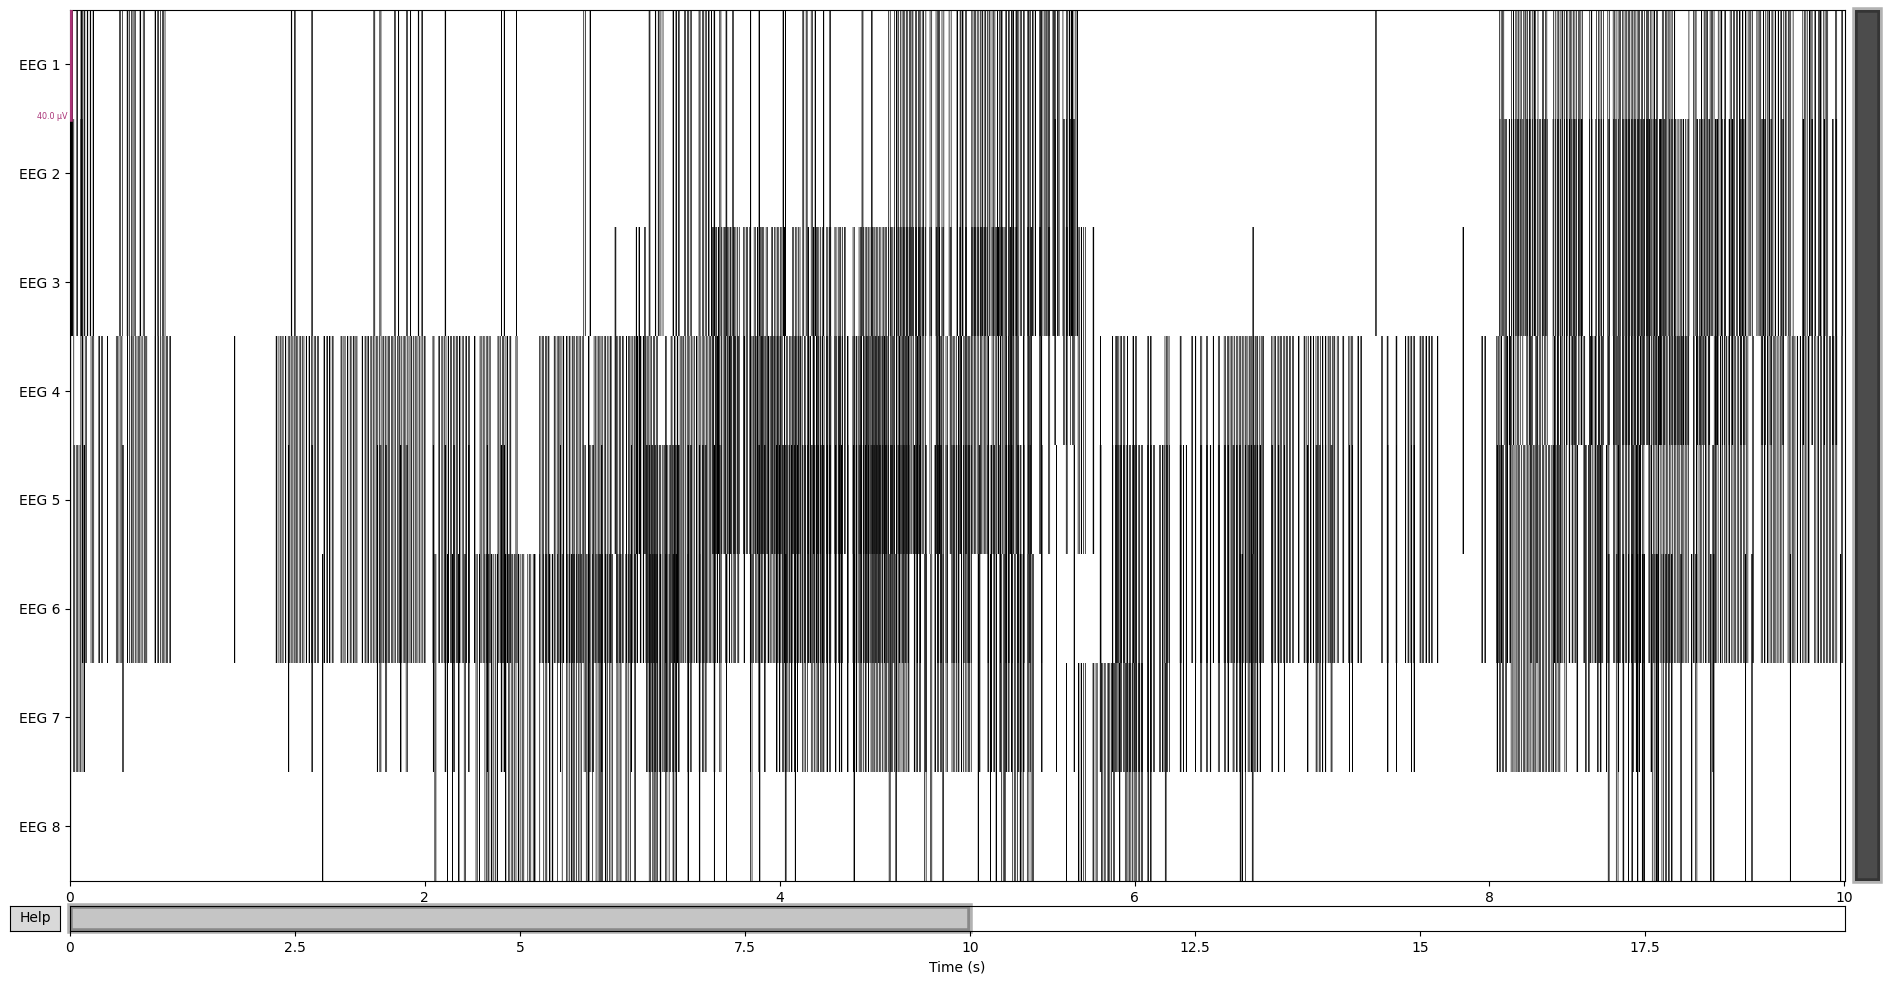

In [41]:
import numpy as np
import mne

# Load EEG and AUX data
eeg_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\eeg_2-per-class_run-1.npy")  # Shape: (n_channels, n_samples)
aux_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\aux_2-per-class_run-1.npy")  # Shape: (3, n_samples)

# Sampling frequency (replace with the actual value from your experiment)
sfreq = 250  # Example: 250 Hz

# Create MNE info object (channel names, sampling frequency, and channel types)
ch_names = [f"EEG {i+1}" for i in range(eeg_data.shape[0])]
ch_types = ['eeg'] * eeg_data.shape[0]
info = mne.create_info(ch_names, sfreq, ch_types)

# Create MNE Raw object from the EEG data
raw_data = mne.io.RawArray(eeg_data, info)

# Plot using MNE's built-in method
raw_data.plot()

Creating RawArray with float64 data, n_channels=8, n_times=4930
    Range : 0 ... 4929 =      0.000 ...    19.716 secs
Ready.


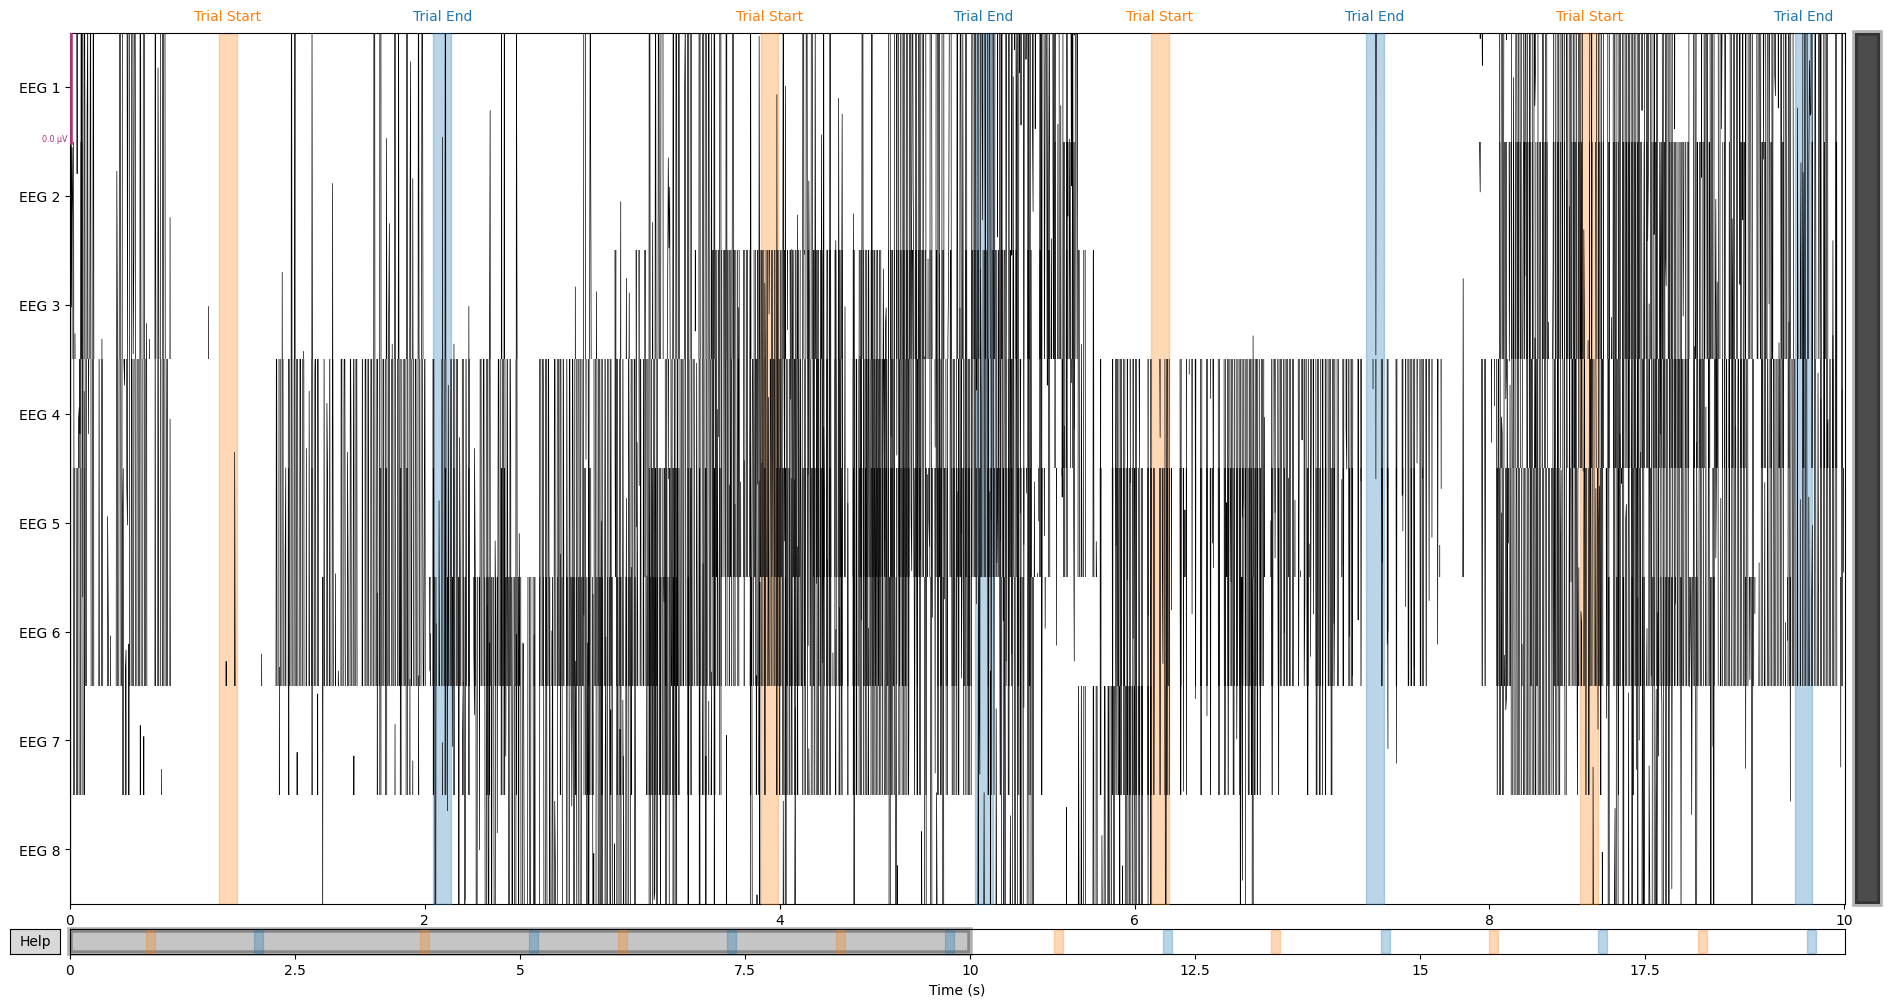

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
['EEG 2']
Channels marked as bad:
none


In [42]:
import numpy as np
import mne

# Load EEG and AUX data
eeg_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\eeg_2-per-class_run-1.npy")  # Shape: (n_channels, n_samples)
aux_data = np.load(r"OpenVEP\data\cyton8_alternating-vep_4-class_1.2s\sub-01\ses-01\aux_2-per-class_run-1.npy")  # Shape: (3, n_samples)

# Sampling frequency (replace with the actual value from your experiment)
sfreq = 250  # Example: 250 Hz

# Create MNE info object (channel names, sampling frequency, and channel types)
ch_names = [f"EEG {i+1}" for i in range(eeg_data.shape[0])]
ch_types = ['eeg'] * eeg_data.shape[0]
info = mne.create_info(ch_names, sfreq, ch_types)

# Create MNE Raw object from the EEG data
raw_data = mne.io.RawArray(eeg_data, info)

# Detect trial starts and ends from the photosensor signal (aux[1])
photo_trigger = (aux_data[1] > 20).astype(int)
trial_starts = np.where(np.diff(photo_trigger) == 1)[0]
trial_ends = np.where(np.diff(photo_trigger) == -1)[0]

# Convert trial start and end times to seconds
trial_starts_sec = trial_starts / sfreq
trial_ends_sec = trial_ends / sfreq

# Create annotations for trial starts and ends (with a duration of 0.1s for each event)
annotations = []
for start in trial_starts_sec:
    annotations.append((start, 'stimulus', 'Trial Start', 0.1))  # Adding duration
for end in trial_ends_sec:
    annotations.append((end, 'stimulus', 'Trial End', 0.1))  # Adding duration

# Add annotations to the raw data
raw_data.set_annotations(mne.annotations.Annotations(onset=[ann[0] for ann in annotations],
                                                     description=[ann[2] for ann in annotations],
                                                     duration=[ann[3] for ann in annotations],  # Duration added here
                                                     orig_time=None))

# Plot the data with event markers
raw_data.plot(duration=10, n_channels=eeg_data.shape[0], scalings='auto', show=True)
